# Overview of the CIDDS-001 dataset
Overview inclues
1. dataset size
2. dataset feature types
3. missing values in the dataset
4. Unique Categorical Features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Openstack

In [2]:
dataset_pd_openstack = pd.read_parquet(
    "/home/jbct/Projects/thesis/db-ocsvm/data/raw/CIDDS-001/cidds-001-openstack.parquet"
)
dataset_pd_openstack.head()

,duration,proto,packets,bytes,flows,tcp_urg,tcp_ack,tcp_psh,tcp_rst,tcp_syn,tcp_fin,tos,label,attack_type,attack_id
0,0.018,TCP,2,338.0,1,0,1,1,0,0,0,0,normal,benign,0
1,0.000,TCP,1,212.0,1,0,1,1,0,0,0,32,normal,benign,0
2,0.000,TCP,1,108.0,1,0,1,1,0,0,0,0,normal,benign,0
3,0.006,TCP,2,174.0,1,0,1,1,0,0,0,0,normal,benign,0
4,0.019,TCP,2,338.0,1,0,1,1,0,0,0,0,normal,benign,0


## Dataset Size

In [3]:
print("Train set shape (rows, columns)")
print(dataset_pd_openstack.shape)

Train set shape (rows, columns)
(4161690, 15)


## Dataset datatypes

In [4]:
dataset_pd_openstack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161690 entries, 0 to 4161689
Data columns (total 15 columns):
 #   Column       Dtype   
---  ------       -----   
 0   duration     float32 
 1   proto        category
 2   packets      int32   
 3   bytes        float32 
 4   flows        int8    
 5   tcp_urg      int8    
 6   tcp_ack      int8    
 7   tcp_psh      int8    
 8   tcp_rst      int8    
 9   tcp_syn      int8    
 10  tcp_fin      int8    
 11  tos          int16   
 12  label        category
 13  attack_type  category
 14  attack_id    int8    
dtypes: category(3), float32(2), int16(1), int32(1), int8(8)
memory usage: 99.2 MB


## Checking for null values of both train and test set

In [5]:
dataset_pd_openstack.isnull().sum()

duration       0
proto          0
packets        0
bytes          0
flows          0
tcp_urg        0
tcp_ack        0
tcp_psh        0
tcp_rst        0
tcp_syn        0
tcp_fin        0
tos            0
label          0
attack_type    0
attack_id      0
dtype: int64

There are no missing values in the dataset

## Unique Categorical Values

### Unqiue values of CIDDS-001 dataset

In [6]:
unique_values = dataset_pd_openstack.select_dtypes(include=["category"])
unique_values.head()

,proto,label,attack_type
0,TCP,normal,benign
1,TCP,normal,benign
2,TCP,normal,benign
3,TCP,normal,benign
4,TCP,normal,benign


In [7]:
print("proto: ")
unique_values_prtcl_type = unique_values["proto"].unique().tolist()
print(f"Unique Values: {unique_values_prtcl_type}")
print(f"Unique Values Count: {len(unique_values_prtcl_type)}")
print("")
print("label: ")
unique_values_label = unique_values["label"].unique().tolist()
print(f"Unique Values: {unique_values_label}")
print(f"Unique Values Count: {len(unique_values_label)}")
print("")
print("attack_type: ")
unique_values_attack_type = unique_values["attack_type"].unique().tolist()
print(f"Unique Values: {unique_values_attack_type}")
print(f"Unique Values Count: {len(unique_values_attack_type)}")

proto: 
Unique Values: ['TCP  ', 'UDP  ', 'IGMP ', 'ICMP ']
Unique Values Count: 4

label: 
Unique Values: ['normal', 'attacker', 'victim']
Unique Values Count: 3

attack_type: 
Unique Values: ['benign', 'portScan', 'dos', 'pingScan', 'bruteForce']
Unique Values Count: 5


Thre are 4 main attack types:
1. portScan
2. dos
3. pingScan
4. bruteForce

label
normal      4152916
attacker       5250
victim         3524
Name: count, dtype: int64


<Axes: title={'center': 'Label Count'}, xlabel='label'>

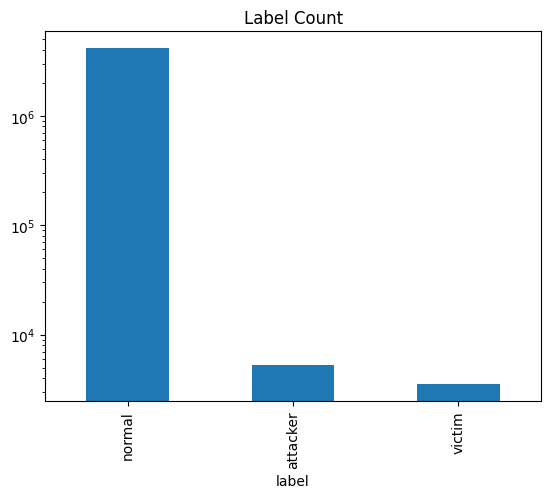

In [8]:
label_count = dataset_pd_openstack["label"].value_counts()
print(label_count)
label_count.plot(kind="bar", title="Label Count", logy=True)

attack_type
benign        4152916
dos              5564
portScan         1730
bruteForce        804
pingScan          676
Name: count, dtype: int64


<Axes: title={'center': 'Attack Type Count'}, xlabel='attack_type'>

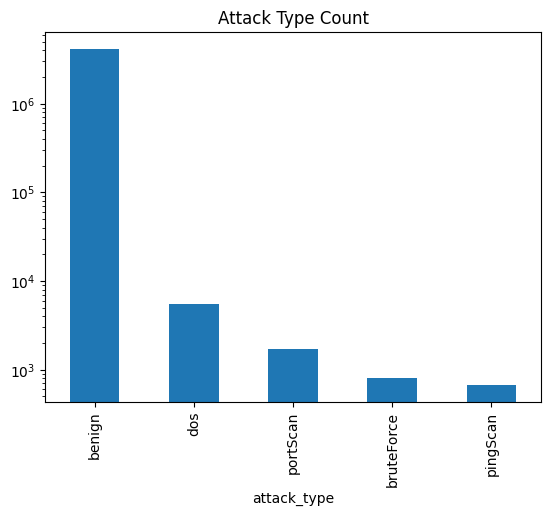

In [9]:
attack_type_count = dataset_pd_openstack["attack_type"].value_counts()
print(attack_type_count)
attack_type_count.plot(kind="bar", title="Attack Type Count", logy=True)

## Dataset Description

In [17]:
dataset_pd_openstack.describe()

,duration,packets,bytes,flows,tcp_urg,tcp_ack,tcp_psh,tcp_rst,tcp_syn,tcp_fin,tos,attack_id
count,4.161690e+06,4.161690e+06,4.161690e+06,4161690.0,4161690.0,4.161690e+06,4.161690e+06,4.161690e+06,4.161690e+06,4.161690e+06,4.161690e+06,4.161690e+06
mean,7.330577e-01,1.015606e+02,1.416325e+05,1.0,0.0,9.897486e-01,9.724102e-01,1.496435e-02,6.258099e-01,1.591803e-01,1.297373e+01,8.256622e-02
std,2.072006e+00,2.694825e+03,5.589196e+06,0.0,0.0,1.007287e-01,1.637943e-01,1.214102e-01,4.839131e-01,3.658442e-01,1.595379e+01,2.014071e+00
min,0.000000e+00,1.000000e+00,4.200000e+01,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.270000e-01,5.000000e+00,1.093000e+03,1.0,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.460000e-01,8.000000e+00,2.132000e+03,1.0,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.320000e-01,1.300000e+01,5.661000e+03,1.0,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00
max,2.380080e+02,2.087680e+05,5.162000e+08,1.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.920000e+02,7.000000e+01


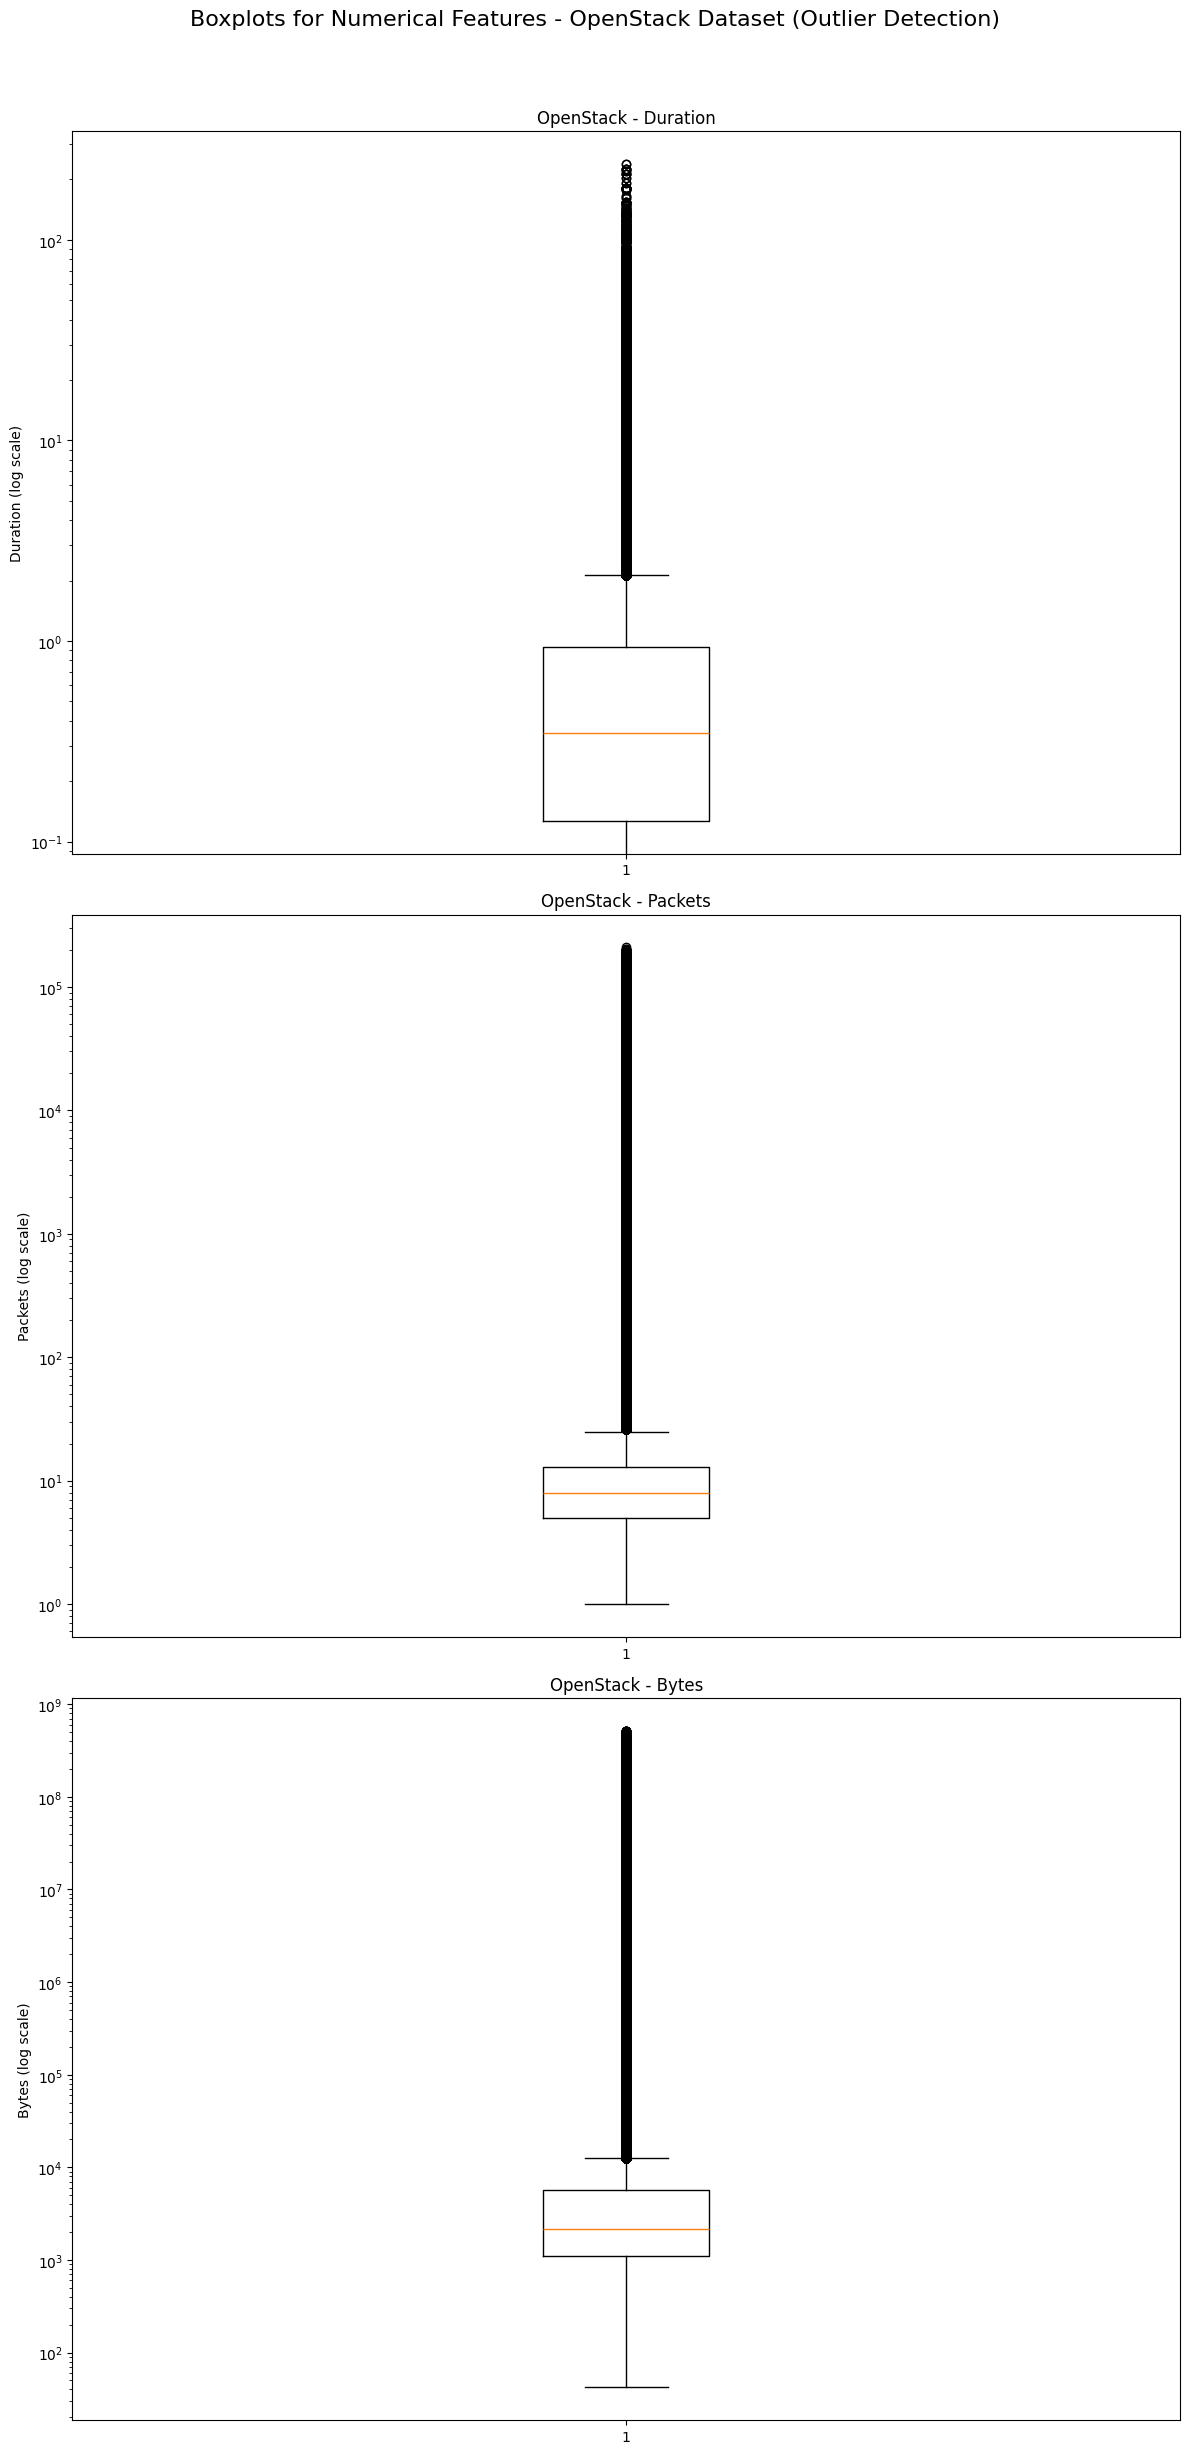

In [25]:
numerical_features = ['duration', 'packets', 'bytes']

# Create subplots - one for each feature
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 25))
fig.suptitle('Boxplots for Numerical Features - OpenStack Dataset (Outlier Detection)', fontsize=16)

for i, feature in enumerate(numerical_features):
    # OpenStack dataset
    axes[i].boxplot(dataset_pd_openstack[feature])
    axes[i].set_title(f'OpenStack - {feature.capitalize()}')
    axes[i].set_yscale('log')
    axes[i].set_ylabel(f'{feature.capitalize()} (log scale)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Applying t-SNE (this may take a while)...
t-SNE completed in 480.64 seconds


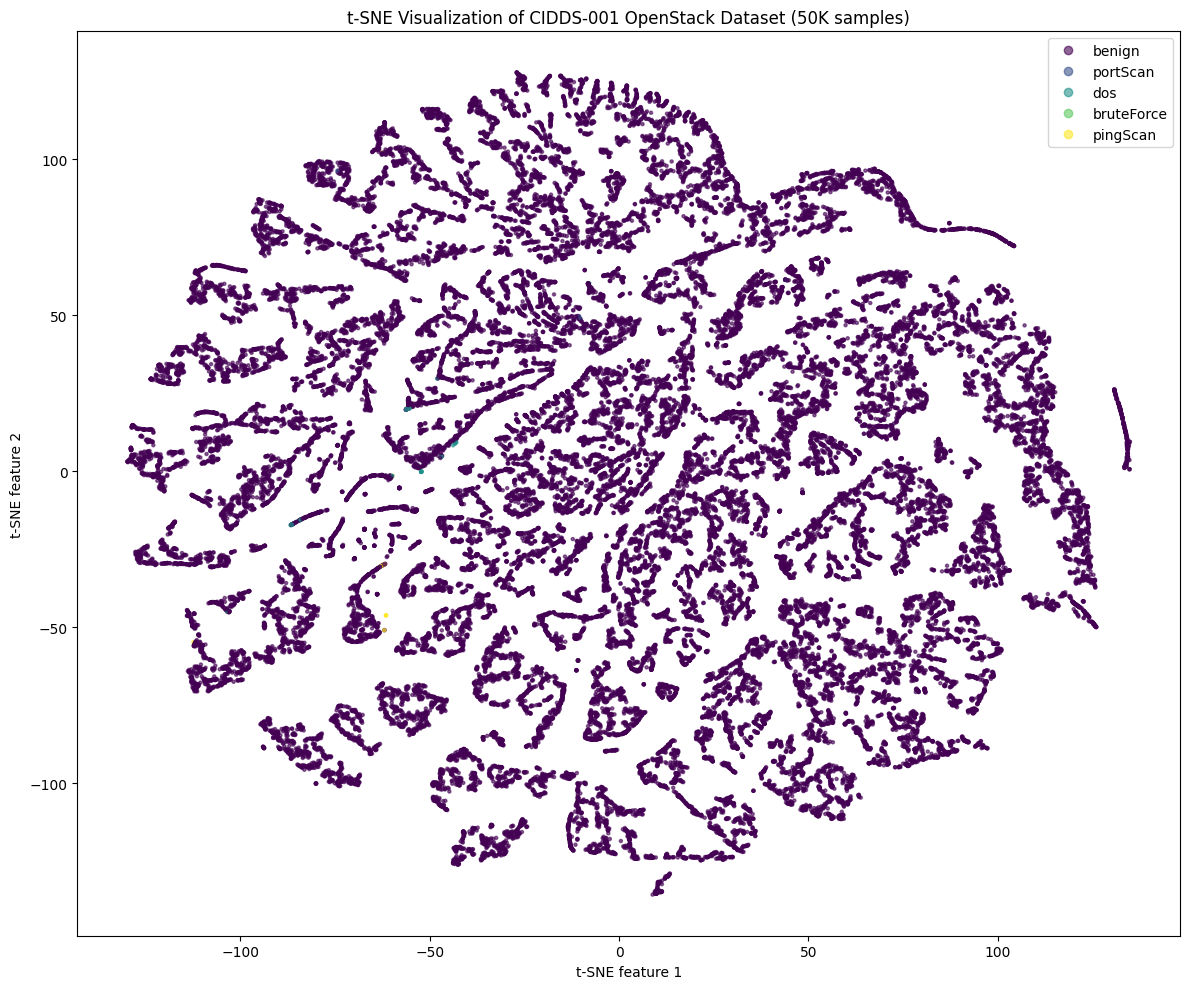

In [26]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
import time

# Sample 50k rows from the dataset
sampled_data = dataset_pd_openstack.sample(n=50000, random_state=42)

# Select numerical features for t-SNE
features = ['duration', 'packets', 'bytes', 'tcp_urg', 'tcp_ack', 'tcp_psh', 
            'tcp_rst', 'tcp_syn', 'tcp_fin', 'tos']

# Scale the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(sampled_data[features])

# Apply t-SNE
print("Applying t-SNE (this may take a while)...")
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_results = tsne.fit_transform(scaled_data)
print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")

# Create the plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    tsne_results[:, 0], 
    tsne_results[:, 1], 
    c=sampled_data['attack_type'].astype('category').cat.codes,
    cmap='viridis', 
    alpha=0.6, 
    s=5
)

# Add legend
legend_labels = sampled_data['attack_type'].unique()
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.title('t-SNE Visualization of CIDDS-001 OpenStack Dataset (50K samples)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.tight_layout()
plt.show()

# External

In [10]:
dataset_pd_external = pd.read_parquet(
    "/home/jbct/Projects/thesis/db-ocsvm/data/raw/CIDDS-001/cidds-001-externalserver.parquet"
)
dataset_pd_external.head()

,duration,proto,packets,bytes,flows,tcp_urg,tcp_ack,tcp_psh,tcp_rst,tcp_syn,tcp_fin,tos,label,attack_type,attack_id
0,0.000,TCP,1,46.0,1,0,0,0,0,1.0,0.0,0,suspicious,benign,0
1,0.000,TCP,1,40.0,1,0,1,0,1,0.0,0.0,0,suspicious,benign,0
2,0.001,TCP,1,46.0,1,0,0,0,0,1.0,0.0,0,suspicious,benign,0
3,0.001,TCP,1,40.0,1,0,1,0,1,0.0,0.0,0,suspicious,benign,0
4,0.018,UDP,1,76.0,1,0,0,0,0,0.0,0.0,0,suspicious,benign,0


## Dataset Size


In [11]:
print("Train set shape (rows, columns)")
print(dataset_pd_external.shape)

Train set shape (rows, columns)
(204492, 15)


## Dataset datatypes

In [12]:
dataset_pd_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204492 entries, 0 to 204491
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   duration     204492 non-null  float32 
 1   proto        204492 non-null  category
 2   packets      204492 non-null  int32   
 3   bytes        204492 non-null  float32 
 4   flows        204492 non-null  int8    
 5   tcp_urg      204492 non-null  int8    
 6   tcp_ack      204492 non-null  int8    
 7   tcp_psh      204492 non-null  int8    
 8   tcp_rst      204492 non-null  int8    
 9   tcp_syn      204492 non-null  float32 
 10  tcp_fin      204492 non-null  float32 
 11  tos          204492 non-null  int8    
 12  label        204492 non-null  category
 13  attack_type  204492 non-null  category
 14  attack_id    204492 non-null  int8    
dtypes: category(3), float32(4), int32(1), int8(7)
memory usage: 5.9 MB


## Checking for null values

In [13]:
dataset_pd_external.isnull().sum()

duration       0
proto          0
packets        0
bytes          0
flows          0
tcp_urg        0
tcp_ack        0
tcp_psh        0
tcp_rst        0
tcp_syn        0
tcp_fin        0
tos            0
label          0
attack_type    0
attack_id      0
dtype: int64

There are no missing values in the dataset

## Unique Categorical Values

### Unique values of External dataset

In [14]:
unique_values = dataset_pd_external.select_dtypes(include=["category"])
unique_values.head()
print("proto: ")
unique_values_prtcl_type = unique_values["proto"].unique().tolist()
print(f"Unique Values: {unique_values_prtcl_type}")
print(f"Unique Values Count: {len(unique_values_prtcl_type)}")
print("")
print("label: ")
unique_values_label = unique_values["label"].unique().tolist()
print(f"Unique Values: {unique_values_label}")
print(f"Unique Values Count: {len(unique_values_label)}")
print("")
print("attack_type: ")
unique_values_attack_type = unique_values["attack_type"].unique().tolist()
print(f"Unique Values: {unique_values_attack_type}")
print(f"Unique Values Count: {len(unique_values_attack_type)}")

proto: 
Unique Values: ['TCP  ', 'UDP  ', 'ICMP ', 'GRE  ']
Unique Values Count: 4

label: 
Unique Values: ['suspicious', 'unknown', 'normal', 'attacker', 'victim']
Unique Values Count: 5

attack_type: 
Unique Values: ['benign', 'portScan', 'bruteForce']
Unique Values Count: 3


Thre are 2 main attack types:
1. portScan
2. bruteFroce


label
suspicious    181406
unknown        14769
normal          5216
attacker        1572
victim          1529
Name: count, dtype: int64


<Axes: title={'center': 'Label Count'}, xlabel='label'>

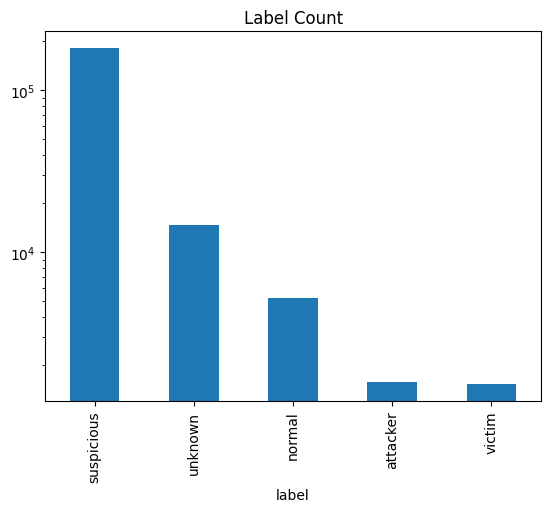

In [15]:
label_count = dataset_pd_external["label"].value_counts()
print(label_count)
label_count.plot(kind="bar", title="Label Count", logy=True)

attack_type
benign        201391
bruteForce      2381
portScan         720
Name: count, dtype: int64


<Axes: title={'center': 'Attack Type Count'}, xlabel='attack_type'>

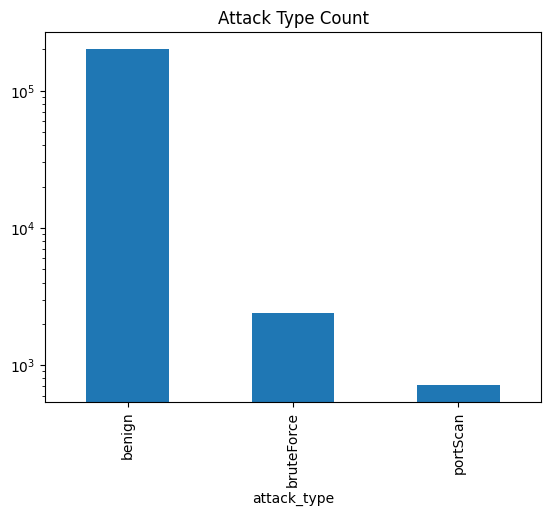

In [16]:
attack_type_count = dataset_pd_external["attack_type"].value_counts()
print(attack_type_count)
attack_type_count.plot(kind="bar", title="Attack Type Count", logy=True)